# Trabajo Práctico 1

In [14]:
!pip install -q beautifulsoup4

In [3]:
from bs4 import BeautifulSoup
import requests

In [15]:
#def :

def descargar_dataset(url: str, nombre_descarga: str):
  """ Descarga un archivo desde una url y lo renombra con el nombre de la descarga.

      Args:
        url (str): Contiene la url de descarga.
        nombre_del_archivo (str): Contiene el nombre del arachivo descargado.
  """
  if len(url) > 0:
    paths = url.split("/")
    url = paths[0]
    for i in range(1, len(paths)):
      if "view" not in paths[i].lower():
        if "file" == paths[i].lower():
          url += "/u"
        elif "d" == paths[i].lower():
          url += "/0"
        elif "" == paths[i].lower():
          url += "/"
        elif "drive" in paths[i].lower():
          url += "/" + paths[i]
        else:
          url += "/uc?id=" + paths[i] + "&export=download"
          break
    response = requests.get(url=url)
    page = BeautifulSoup(response.content)
    url = f'"{page.find("form", id="download-form").get("action")}"'
    !wget -X POST {url} -O {nombre_descarga}


descargar_dataset('https://drive.google.com/file/d/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2/view', 'Courses_Berkeley_2022-02-02.csv')

--2023-10-15 20:36:03--  https://drive.google.com/uc?id=15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2&export=download&confirm=t&uuid=12302da5-9a55-411a-a49b-e8f149fff466
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/difei32s6nf53f3q68k9d978bca3gkc0/1697402100000/07019282373600526072/*/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2?e=download&uuid=12302da5-9a55-411a-a49b-e8f149fff466 [following]
--2023-10-15 20:36:03--  https://doc-0s-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/difei32s6nf53f3q68k9d978bca3gkc0/1697402100000/07019282373600526072/*/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2?e=download&uuid=12302da5-9a55-411a-a49b-e8f149fff466
Resolving doc-0s-2k-docs.googleusercontent.com (doc-0s-2k-docs

# Ejercicio 1

Vamos a trabajar con el dataset [California university history \[Courses\]](https://drive.google.com/file/d/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2/view?usp=drive_link) desde Google Drive. El nombre del archivo es `Courses_Berkeley_2022-02-02.csv`

URL: https://drive.google.com/file/d/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2/view?usp=drive_link

Más información en [kaggle - California university history \[Courses\]](https://www.kaggle.com/datasets/sujaykapadnis/california-university-history)

Las columnas del dataset son:
- Year: Contiene el año en que se dicto.
- Field: Contiene el campo de estudio.
- Name: Contiene el nombre.
- Number: Contiene el número asignado.
- Area: Contiene el área de interes.
- GenArea: Contiene el área de aplicación.
- Description: Contiene una breve descripción.
- Profs1: Contiene el id del profesor.
- Profs2: Contiene el id del colaborador.
- Female: Me dice si el sexo es femenino.
- Fall: Me dice si se dicto en otoño.
- Winter: Me dice si se dicto en invierno.
- Spring: Me dice si se dicto en primavera.
- Summer: Me dice si se dicto en verano.
- Taught: Me dice si se enseño.


## Punto 1

Descargar y levantar el dataset

In [16]:
#def :

def descargar_dataset(url: str, nombre_descarga: str):
  """ Descarga un archivo desde una url y lo renombra con el nombre de la descarga.

      Args:
        url (str): Contiene la url de descarga.
        nombre_del_archivo (str): Contiene el nombre del arachivo descargado.
  """
  if len(url) > 0:
    paths = url.split("/")
    url = paths[0]
    for i in range(1, len(paths)):
      if "view" not in paths[i].lower():
        if "file" == paths[i].lower():
          url += "/u"
        elif "d" == paths[i].lower():
          url += "/0"
        elif "" == paths[i].lower():
          url += "/"
        elif "drive" in paths[i].lower():
          url += "/" + paths[i]
        else:
          url += "/uc?id=" + paths[i] + "&export=download"
          break
    response = requests.get(url=url)
    page = BeautifulSoup(response.content)
    url = f'"{page.find("form", id="download-form").get("action")}"'
    !wget -X POST {url} -O {nombre_descarga}


descargar_dataset('https://drive.google.com/file/d/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2/view', 'Courses_Berkeley_2022-02-02.csv')


--2023-10-15 20:36:13--  https://drive.google.com/uc?id=15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2&export=download&confirm=t&uuid=86d580e9-b013-432e-a9ab-8fe7680c9e69
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/difei32s6nf53f3q68k9d978bca3gkc0/1697402100000/07019282373600526072/*/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2?e=download&uuid=86d580e9-b013-432e-a9ab-8fe7680c9e69 [following]
--2023-10-15 20:36:13--  https://doc-0s-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/difei32s6nf53f3q68k9d978bca3gkc0/1697402100000/07019282373600526072/*/15OKC-w02c_9aE4n9pyW_Xot0l9R-jdZ2?e=download&uuid=86d580e9-b013-432e-a9ab-8fe7680c9e69
Resolving doc-0s-2k-docs.googleusercontent.com (doc-0s-2k-docs

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('/content/Courses_Berkeley_2022-02-02.csv', header= 0,
                        encoding= 'unicode_escape')
dataset.info()
dataset.head(100)

<ipython-input-17-cf15e5a3a2bc>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/Courses_Berkeley_2022-02-02.csv', header= 0,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311897 entries, 0 to 311896
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         311897 non-null  int64  
 1   Field        311897 non-null  object 
 2   Name         311897 non-null  object 
 3   Number       311896 non-null  object 
 4   Area         311897 non-null  object 
 5   GenArea      311897 non-null  object 
 6   Description  301001 non-null  object 
 7   Profs1       159776 non-null  float64
 8   Profs2       25472 non-null   float64
 9   Female       159776 non-null  object 
 10  Fall         311897 non-null  bool   
 11  Winter       311897 non-null  bool   
 12  Spring       311897 non-null  bool   
 13  Summer       311897 non-null  bool   
 14  Taught       311897 non-null  bool   
dtypes: bool(5), float64(2), int64(1), object(7)
memory usage: 25.3+ MB


,Year,Field,Name,Number,Area,GenArea,Description,Profs1,Profs2,Female,Fall,Winter,Spring,Summer,Taught
0,1967,Aerospace Studies,Officer Basic Military Training,22,Military Science and Tactics,Professional,(6) Study of world military systems and basic...,NaN,NaN,NaN,False,False,False,False,False
1,1971,Aerospace Studies,Officer Advanced Military Training,432,Military Science and Tactics,Professional,(3) Four weeks advanced officer training cond...,NaN,NaN,NaN,False,False,False,False,False
2,1973,Aerospace Studies,World Political Military Systems,1A-1B-ic,Military Science and Tactics,Professional,(1-1-1) One 1-hour lecture/seminar and one ho...,NaN,NaN,NaN,True,False,False,False,True
3,1973,Aerospace Studies,Officer Advanced Military Training,432,Military Science and Tactics,Professional,(3) Four weeks advanced officer training cond...,NaN,NaN,NaN,False,False,False,False,False
4,1974,Aerospace Studies,Special study for graduate students in prepari...,602,Military Science and Tactics,Professional,Special study for graduate students in prepar...,NaN,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1999,African-American Studies,Directed Group Studies for Freshmen and Sophom...,98,Ethnic Studies,Social Sciences,(1-4) Course may be repeated for credit. Enro...,NaN,NaN,NaN,True,False,True,False,True
96,1999,African-American Studies,Directed Group Studies for Freshmen and Sophom...,99,Ethnic Studies,Social Sciences,(1-4) Course may be repeated for credit. Enro...,NaN,NaN,NaN,True,False,True,False,True
97,1999,African-American Studies,Research Methods for African American Studies,101,Ethnic Studies,Social Sciences,(4) Three hours of lecture and one hour of la...,NaN,NaN,NaN,False,False,False,False,False
98,1999,African-American Studies,Political and Economic Development in the Thir...,112A,Ethnic Studies,Social Sciences,(4) Four hours of lecture per week. An examin...,NaN,NaN,NaN,True,False,False,False,True


## Punto 2

Mostrar por pantalla las columnas año, campo y nombre ordenados alfabéticamente primero por el año, luego por el campo y por último por el nombre. El orden debe ser descendente para todas las columnas.

In [18]:
dtOrder=dataset
dtOrder=dataset.sort_values(by=['Year','Field','Name'], ascending=[False, False, False])
dtOrder[['Year','Field','Name']]

# Muestra el DataFrame ordenado

,Year,Field,Name
185334,2011,"Theater, Dance and Performance Studies",University Theatre Workshop
185338,2011,"Theater, Dance and Performance Studies","Theatrical Texts, Spaces, and Bodies"
185333,2011,"Theater, Dance and Performance Studies",Theatrical Realization of Dramatic Texts
185332,2011,"Theater, Dance and Performance Studies",Theatrical Realization of Dance
151200,2011,"Theater, Dance and Performance Studies",Theatre Performance
...,...,...,...
9597,1900,Architecture,Apiculture
9587,1900,Architecture,Analysis of Must and Wine
9576,1900,Architecture,Advanced Soil Chemistry and Soil Physics
9591,1900,Architecture,Advanced Instruction in Horticulture



## Punto 3

Mostrar por pantalla la cantidad de materias que se dictaron por estación del año. Solo se deben contabilizar aquellas materias que posean datos en todas las filas.


In [19]:
dtOrder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311897 entries, 185334 to 9588
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         311897 non-null  int64  
 1   Field        311897 non-null  object 
 2   Name         311897 non-null  object 
 3   Number       311896 non-null  object 
 4   Area         311897 non-null  object 
 5   GenArea      311897 non-null  object 
 6   Description  301001 non-null  object 
 7   Profs1       159776 non-null  float64
 8   Profs2       25472 non-null   float64
 9   Female       159776 non-null  object 
 10  Fall         311897 non-null  bool   
 11  Winter       311897 non-null  bool   
 12  Spring       311897 non-null  bool   
 13  Summer       311897 non-null  bool   
 14  Taught       311897 non-null  bool   
dtypes: bool(5), float64(2), int64(1), object(7)
memory usage: 27.7+ MB


In [20]:
datasinna= dtOrder.dropna()
datasinna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 292960 to 307139
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         24783 non-null  int64  
 1   Field        24783 non-null  object 
 2   Name         24783 non-null  object 
 3   Number       24783 non-null  object 
 4   Area         24783 non-null  object 
 5   GenArea      24783 non-null  object 
 6   Description  24783 non-null  object 
 7   Profs1       24783 non-null  float64
 8   Profs2       24783 non-null  float64
 9   Female       24783 non-null  object 
 10  Fall         24783 non-null  bool   
 11  Winter       24783 non-null  bool   
 12  Spring       24783 non-null  bool   
 13  Summer       24783 non-null  bool   
 14  Taught       24783 non-null  bool   
dtypes: bool(5), float64(2), int64(1), object(7)
memory usage: 2.2+ MB


In [21]:
count_invierno = datasinna["Winter"].sum()
count_primavera =datasinna["Spring"].sum()
count_verano = datasinna["Summer"].sum()


# Mostrar la cantidad de materias por estación del año con datos en todas las filas
print("Invierno:", count_invierno)
print("Primavera:", count_primavera)
print("Verano:", count_verano)


Invierno: 14584
Primavera: 8272
Verano: 89


## Punto 4

Mostrar por pantalla el porcentaje de materias que se dictan por área.

In [22]:
# Contar cuántas materias pertenecen a cada área
conteo_areas = dataset["Area"].value_counts()

# Calcular el porcentaje dividiendo por el número total de materias y multiplicando por 100
porcentaje_areas = (conteo_areas / len(dataset)) * 100

# Mostrar el porcentaje por pantalla
print("Porcentaje de materias por área:")
print(porcentaje_areas)


Porcentaje de materias por área:
Biology                       5.669500
Ethnic Studies                4.817937
Education                     3.281532
Other Engineering             3.017022
Architecture                  2.884927
                                ...   
Development                   0.010901
Dentistry                     0.007054
Demography                    0.006733
Veterinary Science            0.003847
Transportation Engineering    0.002244
Name: Area, Length: 98, dtype: float64


## Punto 5

Realizar un gráfico de barras horizontal con la cantidad de materias que se dictan por año.

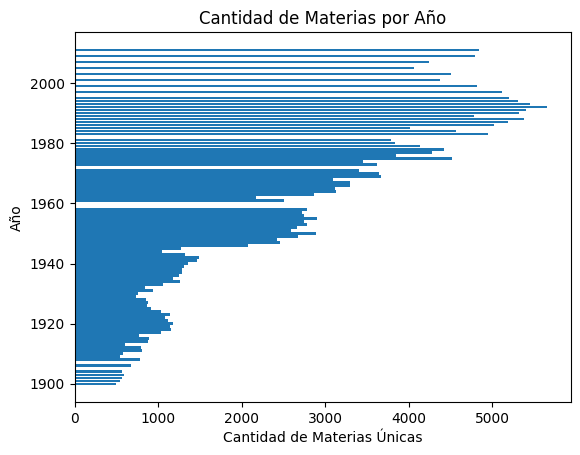

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Contar la cantidad de materias únicas por año
conteo_materias_por_año = dataset.groupby("Year")["Name"].nunique()

# Crear el gráfico de barras horizontales
plt.barh(conteo_materias_por_año.index, conteo_materias_por_año.values)

# Configurar etiquetas y título del gráfico
plt.xlabel("Cantidad de Materias Únicas")
plt.ylabel("Año")
plt.title("Cantidad de Materias por Año")

# Mostrar el gráfico
plt.show()

# Ejercicio 2

Vamos a trabajar con el dataset [120 Million Word Spanish Corpus](https://drive.google.com/file/d/1XsPdHAgOXGasJ6AIjwB8MlZnQy7vwx6b/view?usp=sharing) desde Google Drive. El nombre del archivo es `spanishText_10000_15000.xml`.

URL: https://drive.google.com/file/d/1XsPdHAgOXGasJ6AIjwB8MlZnQy7vwx6b/view?usp=sharing

Más información en [kaggle - 120 Million Word Spanish Corpus](https://www.kaggle.com/datasets/rtatman/120-million-word-spanish-corpus?select=spanishText_10000_15000)

Las columnas del dataset son:

- id: Número de identificación
- title: Título del artículo
- nonfiltered: Artículo filtrado.
- processed:  Artículo procesado.
- dbindex: Índice de la base de datos.

## Punto 1

Descargar y levantar el dataset

In [4]:
def descargar_dataset(url: str, nombre_descarga: str):
  """ Descarga un archivo desde una url y lo renombra con el nombre de la descarga.

      Args:
        url (str): Contiene la url de descarga.
        nombre_del_archivo (str): Contiene el nombre del arachivo descargado.
  """
  if len(url) > 0:
    paths = url.split("/")
    url = paths[0]
    for i in range(1, len(paths)):
      if "view" not in paths[i].lower():
        if "file" == paths[i].lower():
          url += "/u"
        elif "d" == paths[i].lower():
          url += "/0"
        elif "" == paths[i].lower():
          url += "/"
        elif "drive" in paths[i].lower():
          url += "/" + paths[i]
        else:
          url += "/uc?id=" + paths[i] + "&export=download"
          break
    response = requests.get(url=url)
    page = BeautifulSoup(response.content)
    url = f'"{page.find("form", id="download-form").get("action")}"'
    !wget -X POST {url} -O {nombre_descarga}


descargar_dataset('https://drive.google.com/file/d/1XsPdHAgOXGasJ6AIjwB8MlZnQy7vwx6b/view', 'spanishText_10000_15000.xml')

--2023-10-15 20:33:33--  https://drive.google.com/uc?id=1XsPdHAgOXGasJ6AIjwB8MlZnQy7vwx6b&export=download&confirm=t&uuid=4ae9aba9-61b0-4f60-bfd4-6bc242e64dca
Resolving drive.google.com (drive.google.com)... 142.250.101.139, 142.250.101.100, 142.250.101.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/miurblqlfm9k0dgkfk8k57n5blg8io1n/1697401950000/07019282373600526072/*/1XsPdHAgOXGasJ6AIjwB8MlZnQy7vwx6b?e=download&uuid=4ae9aba9-61b0-4f60-bfd4-6bc242e64dca [following]
--2023-10-15 20:33:40--  https://doc-0k-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/miurblqlfm9k0dgkfk8k57n5blg8io1n/1697401950000/07019282373600526072/*/1XsPdHAgOXGasJ6AIjwB8MlZnQy7vwx6b?e=download&uuid=4ae9aba9-61b0-4f60-bfd4-6bc242e64dca
Resolving doc-0k-2k-docs.googleusercontent.com (doc-0k

In [6]:
df = pd.read_xml('/content/spanishText_10000_15000.xml', encoding='ISO-8859-1')

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4834 entries, 0 to 4833
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4834 non-null   int64 
 1   title        4834 non-null   object
 2   nonfiltered  4834 non-null   int64 
 3   processed    4834 non-null   int64 
 4   dbindex      4834 non-null   int64 
 5   doc          4834 non-null   object
dtypes: int64(4), object(2)
memory usage: 226.7+ KB


,id,title,nonfiltered,processed,dbindex,doc
0,20540,658,1,1,10000,Acontecimientos .\n\n\n Nacimientos .\n\n\n Fa...
1,20541,659,2,2,10001,Acontecimientos .\n\n\n Nacimientos .\n Egilon...
2,20542,660,3,3,10002,Acontecimientos .\nFin del Califato Perfecto. ...
3,20543,661,4,4,10003,Acontecimientos .\nLos omeyas acceden al calif...
4,20544,662,5,5,10004,Acontecimientos .\n\n\n Nacimientos .\n\n\n Fa...
...,...,...,...,...,...,...
4829,32436,Ampolla,4884,4830,14995,Ampolla puede referirse a:\n\n la vejiga que s...
4830,32439,Henri Wallon (psicólogo),4885,4831,14996,"Henri Wallon (París, 15 de junio de 1879 - Par..."
4831,32442,Folclore y costumbres de Lambayeque,4886,4832,14997,Folclore.\nSe caracteriza por la alegría de su...
4832,32443,Calendario festivo de Lambayeque,4887,4833,14998,El siguiente es el calendario festivo de Lamba...


## Punto 2

Agregar al dataset del ejercicio 1, una nueva columna llamada `date` y completarla con la búsqueda de los patrones del tipo `fecha` (22/11/2009) sobre la columna `doc`. Los valores encontrados deben contatenarse con coma. Se busca que el patrón sea una aproximación.

Mostrar solo las filas que tengan fechas.

Ejemplo de los valores que puede tomar una celda:
- 20/11/2009,01/01/2000
- 12/06/1990

In [7]:
import re
dfdate=df
# Define una función para extraer fechas con expresiones regulares y concatenarlas
def extract_dates(text):
    date_pattern = r'\d{1,2}/\d{1,2}/\d{4}'  # Patrón para fechas (DD/MM/YYYY)
    dates = re.findall(date_pattern, text)
    return ', '.join(dates)

dfdate['date'] = dfdate['doc'].apply(extract_dates)

# Muestra el DataFrame resultante
print(dfdate)

         id                                title  nonfiltered  processed  \
0     20540                                  658            1          1   
1     20541                                  659            2          2   
2     20542                                  660            3          3   
3     20543                                  661            4          4   
4     20544                                  662            5          5   
...     ...                                  ...          ...        ...   
4829  32436                              Ampolla         4884       4830   
4830  32439             Henri Wallon (psicólogo)         4885       4831   
4831  32442  Folclore y costumbres de Lambayeque         4886       4832   
4832  32443     Calendario festivo de Lambayeque         4887       4833   
4833  32446                      Himno de Yungay         4888       4834   

      dbindex                                                doc date  
0       10000  

In [26]:
dfdate.date.max()

'9/2/1992, 1/4/1994, 1/10/1996, 1/4/1997, 1/5/1997, 1/9/1997, 10/3/2000, 15/9/2003, 1/1/2006, 1/1/2008'

## Punto 3

Crear un columna `external_link` y completarla con la sección de `Enlaces externos`.
Agregar al dataset del ejercicio 1, una nueva columna llamada `external_links` y completarla con la búsqueda de los patrones del tipo `enlaces externos` o `url` sobre la columna `doc`. Los valores encontrados deben contatenarse con coma. Se busca que el patrón sea una aproximación.

Los enlaces externos NO deben finalizar en caracteres especiales.

Mostrar solo las filas que tengan enlaces externos.

In [8]:
import re
df_url=df
def extract_external_links(text):
    link_pattern = r'(https?://\S+)|(www\.\S+\.[a-zA-Z]+)'  # Patrón para enlaces externos o URLs
    links = re.findall(link_pattern, text)
    # Filtrar los enlaces que no terminan en caracteres especiales
    valid_links = [link[0] or link[1] for link in links if not link[0].endswith(('.', '!', ',', ';', ':'))]
    return ', '.join(valid_links)

# Aplica la función para crear la nueva columna "external_links"
df_url['external_links'] = df_url['doc'].apply(extract_external_links)

# Muestra el DataFrame resultante
print(df_url)

         id                                title  nonfiltered  processed  \
0     20540                                  658            1          1   
1     20541                                  659            2          2   
2     20542                                  660            3          3   
3     20543                                  661            4          4   
4     20544                                  662            5          5   
...     ...                                  ...          ...        ...   
4829  32436                              Ampolla         4884       4830   
4830  32439             Henri Wallon (psicólogo)         4885       4831   
4831  32442  Folclore y costumbres de Lambayeque         4886       4832   
4832  32443     Calendario festivo de Lambayeque         4887       4833   
4833  32446                      Himno de Yungay         4888       4834   

      dbindex                                                doc date  \
0       10000 

In [9]:
df_url.external_links.max()

'www.verbos.org'

## Punto 4


Crear un columna `read_time` y stimar el tiempo de lectura de cada artículo.

Crear un columna `words_count` y contar la cantidad de palabras de cada artículo.

Mostrar el dataset resultante.

In [10]:
new_df=df
def contar_palabras(texto):
    palabras = texto.split()
    return len(palabras)

# Aplicar la función a la columna "Texto" y crear la nueva columna "Cantidad de Palabras"
new_df['word_count'] = new_df['doc'].apply(contar_palabras)
new_df.head(100)

,id,title,nonfiltered,processed,dbindex,doc,date,external_links,word_count
0,20540,658,1,1,10000,Acontecimientos .\n\n\n Nacimientos .\n\n\n Fa...,,,20
1,20541,659,2,2,10001,Acontecimientos .\n\n\n Nacimientos .\n Egilon...,,,13
2,20542,660,3,3,10002,Acontecimientos .\nFin del Califato Perfecto. ...,,,24
3,20543,661,4,4,10003,Acontecimientos .\nLos omeyas acceden al calif...,,,23
4,20544,662,5,5,10004,Acontecimientos .\n\n\n Nacimientos .\n\n\n Fa...,,,7
...,...,...,...,...,...,...,...,...,...
95,20637,849,96,96,10095,Acontecimientos .\n\n\n Nacimientos .\nAlfredo...,,,14
96,20638,850,97,97,10096,Acontecimientos .\nEn Europa.\n Sacro Imperio ...,,,88
97,20639,851,98,98,10097,Acontecimientos .\nPassio beatissimarum birgin...,,,30
98,20640,852,99,99,10098,Acontecimientos .\n Expansión del Reino de Pam...,,,155


In [11]:
new_df['read_time'] = pd.to_timedelta(new_df['word_count']*2, unit='s')
new_df

,id,title,nonfiltered,processed,dbindex,doc,date,external_links,word_count,read_time
0,20540,658,1,1,10000,Acontecimientos .\n\n\n Nacimientos .\n\n\n Fa...,,,20,0 days 00:00:40
1,20541,659,2,2,10001,Acontecimientos .\n\n\n Nacimientos .\n Egilon...,,,13,0 days 00:00:26
2,20542,660,3,3,10002,Acontecimientos .\nFin del Califato Perfecto. ...,,,24,0 days 00:00:48
3,20543,661,4,4,10003,Acontecimientos .\nLos omeyas acceden al calif...,,,23,0 days 00:00:46
4,20544,662,5,5,10004,Acontecimientos .\n\n\n Nacimientos .\n\n\n Fa...,,,7,0 days 00:00:14
...,...,...,...,...,...,...,...,...,...,...
4829,32436,Ampolla,4884,4830,14995,Ampolla puede referirse a:\n\n la vejiga que s...,,,49,0 days 00:01:38
4830,32439,Henri Wallon (psicólogo),4885,4831,14996,"Henri Wallon (París, 15 de junio de 1879 - Par...",,,284,0 days 00:09:28
4831,32442,Folclore y costumbres de Lambayeque,4886,4832,14997,Folclore.\nSe caracteriza por la alegría de su...,,,569,0 days 00:18:58
4832,32443,Calendario festivo de Lambayeque,4887,4833,14998,El siguiente es el calendario festivo de Lamba...,,,643,0 days 00:21:26


In [12]:
new_df.read_time.max()

Timedelta('0 days 13:28:02')

## Punto 5

Realizar un gráfico de barras donde se relacionen la columna `words_count` y `read_time`.

Se debe agrupar por la columna `words_count` según los siguientes intervalos (intervalos de 1000):

- 0-999
- 1000-1999
- 2000-2999
- ....-....
- 2400-24999

Para cada agrupación se debe calcular el promedio de la columna `read_time`.

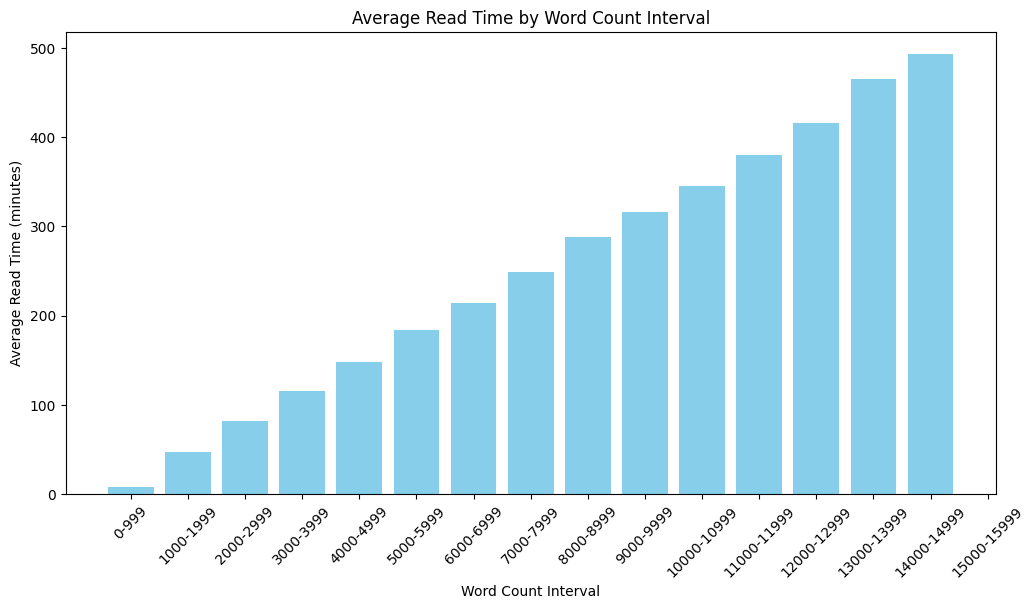

In [13]:
import matplotlib.pyplot as plt
df_grafico=new_df
bins = [i for i in range(0, 25000, 1000)]
labels = [f'{i}-{i+999}' for i in range(0, 24000, 1000)]

# Agregar una columna que mapee cada valor de word_count a su intervalo
df_grafico['word_count_interval'] = pd.cut(df_grafico['word_count'], bins=bins, labels=labels, include_lowest=True)

# Convertir la columna read_time a minutos
df_grafico['read_time_minutes'] = df_grafico['read_time'].dt.total_seconds() / 60

# Calcular el promedio de read_time en minutos para cada intervalo
result = df_grafico.groupby('word_count_interval')['read_time_minutes'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(result['word_count_interval'], result['read_time_minutes'], color='skyblue')
plt.xlabel('Word Count Interval')
plt.ylabel('Average Read Time (minutes)')
plt.title('Average Read Time by Word Count Interval')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



